## Using DeepForest to Train Image Tile on PreBuilt NEON.h5 

**Importing Necessary Libraries**

In [53]:
import os
from matplotlib import pyplot as plt
from deepforest import get_data
from deepforest import deepforest
from deepforest import utilities
from deepforest import preprocess

**Importing .xml File to Convert Into Annotations**

In [32]:
YELL_xml = "2019_YELL_2_528000_4978000_image_crop2.xml"
annotation = utilities.xml_to_annotations(YELL_xml)
annotation.head()

,image_path,xmin,ymin,xmax,ymax,label
0,2019_YELL_2_528000_4978000_image_crop2.tiff,681,369,699,386,Tree
1,2019_YELL_2_528000_4978000_image_crop2.tiff,980,59,998,79,Tree
2,2019_YELL_2_528000_4978000_image_crop2.tiff,953,135,964,150,Tree
3,2019_YELL_2_528000_4978000_image_crop2.tiff,969,183,995,208,Tree
4,2019_YELL_2_528000_4978000_image_crop2.tiff,742,623,751,635,Tree


**Convert the Annotation Dataframe into .csv**

In [33]:
annotation.to_csv("train_data.csv",index=False)

**Preprocess the Image Tile And Split Into Patches**

In [34]:
YELL_train = "2019_YELL_2_528000_4978000_image_crop2.tiff"

#Get Current Directory
crop_dir = "./images"

train_annotations = preprocess.split_raster(path_to_raster=YELL_train,
                                 annotations_file="train_data.csv",
                                 base_dir=crop_dir,
                                 patch_size=400,
                                 patch_overlap=0.05)

View the Train_Annotations (.csv format)

In [35]:
train_annotations.head()

,image_path,xmin,ymin,xmax,ymax,label
28,2019_YELL_2_528000_4978000_image_crop2_1.png,195,115,238,158,Tree
29,2019_YELL_2_528000_4978000_image_crop2_3.png,336,152,383,189,Tree
183,2019_YELL_2_528000_4978000_image_crop2_4.png,316,339,366,400,Tree
230,2019_YELL_2_528000_4978000_image_crop2_4.png,131,343,191,400,Tree
231,2019_YELL_2_528000_4978000_image_crop2_4.png,272,101,312,148,Tree


*Write Annotations Without Header Row*

In [39]:
annotations_file= os.path.join(crop_dir, "train_data_headerless.csv")
train_annotations.to_csv(annotations_file,index=False, header=None)

**Download .h5 file (NEON) Provided by DeepForest**

In [40]:
prebuilt_model = deepforest.deepforest()
prebuilt_model.use_release()

Reading config file: H:\Anaconda\envs\deepforest\lib\site-packages\deepforest\data\deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model.
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/v0.3.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/v0.3.0
tracking <tf.Variable 'Variable_10:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_11:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_12:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_13:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_14:0' shape=(9, 4) dtype=float32> anchors


***Training the Model On NEON.h5 for 10 epochs***

In [45]:
prebuilt_model.config["epochs"] = 5
prebuilt_model.config["save-snapshot"] = False
prebuilt_model.train(annotations=annotations_file, input_type="fit_generator")

There are 1 unique labels: ['Tree'] 
Disabling snapshot saving
Training retinanet with the following args ['--weights', 'H:\\Anaconda\\envs\\deepforest\\lib\\site-packages\\deepforest\\data/NEON.h5', '--backbone', 'resnet50', '--image-min-side', '800', '--multi-gpu', '1', '--epochs', '5', '--steps', '40', '--batch-size', '1', '--tensorboard-dir', 'None', '--workers', '1', '--max-queue-size', '10', '--freeze-layers', '0', '--score-threshold', '0.05', '--save-path', 'snapshots/', '--snapshot-path', 'snapshots/', '--no-snapshots', 'csv', './images\\train_data.csv', './images\\classes.csv']
Creating model, this may take a second...
tracking <tf.Variable 'Variable_25:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_26:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_27:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_28:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_29:0' shape=(9, 4) dtype=float32> an

Epoch 1/5
40/40 [==============================] - 594s 15s/step - loss: 1.9041 - regression_loss: 1.6190 - classification_loss: 0.2851
Epoch 2/5
40/40 [==============================] - 568s 14s/step - loss: 1.7551 - regression_loss: 1.4942 - classification_loss: 0.2609
Epoch 3/5
40/40 [==============================] - 580s 15s/step - loss: 1.6753 - regression_loss: 1.4322 - classification_loss: 0.2431
Epoch 4/5
40/40 [==============================] - 577s 14s/step - loss: 1.6122 - regression_loss: 1.3799 - classification_loss: 0.2323
Epoch 5/5
40/40 [==============================] - 621s 16s/step - loss: 1.5377 - regression_loss: 1.3153 - classification_loss: 0.2225


**Evaluate the Mean Average Precision**

In [46]:
mAP = prebuilt_model.evaluate_generator(annotations=annotations_file)
print("Mean Average Precision is: {:.3f}".format(mAP))

Running network: N/A% (0 of 40) |        | Elapsed Time: 0:00:00 ETA:  --:--:--

There are 1 unique labels: ['Tree'] 
Disabling snapshot saving


Running network: 100% (40 of 40) |#######| Elapsed Time: 0:02:30 Time:  0:02:30
Parsing annotations: 100% (40 of 40) |###| Elapsed Time: 0:00:00 Time:  0:00:00


774 instances of class Tree with average precision: 0.6719
mAP using the weighted average of precisions among classes: 0.6719
mAP: 0.6719
Mean Average Precision is: 0.672


**Saving the Pre-Built Model**

In [49]:
prebuilt_model.model.save("NEON_5_Epoch.h5")

**Plotting the Train Curves**

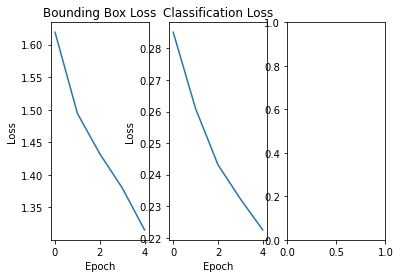

In [47]:
prebuilt_model.plot_curves()

**Predict A Sample Image from Dataset**

*Predict the Annotations of Trees*

In [62]:
predict_image = "SampleImage.png"
image_annotation = prebuilt_model.predict_image(image_path=predict_image, show=False, return_plot = False)
image_annotation.head()

,xmin,ymin,xmax,ymax,score,label
0,310.267334,282.199493,362.447540,335.238892,0.804208,Tree
1,34.733280,66.980865,111.307716,147.343704,0.741080,Tree
2,122.262543,190.736191,177.188171,243.104218,0.726747,Tree
3,0.170733,126.196037,39.470028,182.656464,0.694759,Tree
4,53.320648,312.242279,109.996765,364.340820,0.664039,Tree


*Display the Predicted Image With Bounding Boxes*

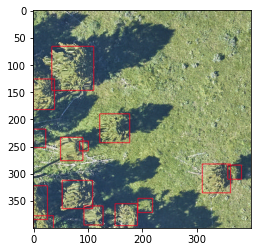

In [65]:
image = prebuilt_model.predict_image(image_path=predict_image,return_plot = True)

plt.imshow(image[...,::-1])
plt.show()